<div style="display: flex; justify-content: space-between;">
    Index Number -  220067G / 220071M
    Group        -  A6
    Date         -  07/03/2024
</div>

# Workshop 2 : Signal Analysis in Frequency Domain

## Fourier Series Approximation

Find the fouries series coefficients of given square wave

![Image not Found](signal.png)

![Image not Found](calculation.jpeg)

In [142]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

### Fourier Series Approximation of a Square pulse.

**Calculating fourier series coefficients**
 

Taking $A = 1V, \, T = 1s$ complete function $a(k)$ to return Fourier coefficients of Square Pulse.

In [143]:
#Square pulse
def square(t):
    if t%1<0.25 or t%1>0.75:
        s=1
    elif t%1==0.25 or t%1==0.75:
        s=0.5
    else:  
        s=0
    return s

def a(k):
    if k==0:
        a_k = 0.5   #fourier coefficient for k=0
    else:
        a_k = np.sin(k*np.pi*0.5)/(k*np.pi)  #fourier coefficients for k!=0
    return a_k


Complete function fs_approx(t,N) to return the value of a Fourier series Approximated periodic signal, at any given time.

In [144]:
def fs_approx(t,N):
    xt=0
    for k in range(-N,N+1):
        xt = xt + a(k)*np.exp(k*2*np.pi*1j*t)   #getting the fourier series approximation

    return xt

### Plot original wave and Fourier series approximation for $N=5$ and $N=50$

Calculating Fourier series approximation for $N=5$ and $N=50$

In [145]:
fs=200 #sampling frequency
ts=1/fs #sampling time

x=[]
y=[]

time=np.arange(-2.5,2.5,ts) #creating an array t with equally spaced 1000 points between -2.5 and 2.5


N=5

for t in time:
    x.append(square(t)) #calculating the square wave for each t
    y.append(fs_approx(t,N).real) #calculating the fourier series approximation for each t

N=50
y2=[]
for t in time:
    y2.append(fs_approx(t,N).real)


Plotting fourier series approximation for $N=5$ and $N=50$

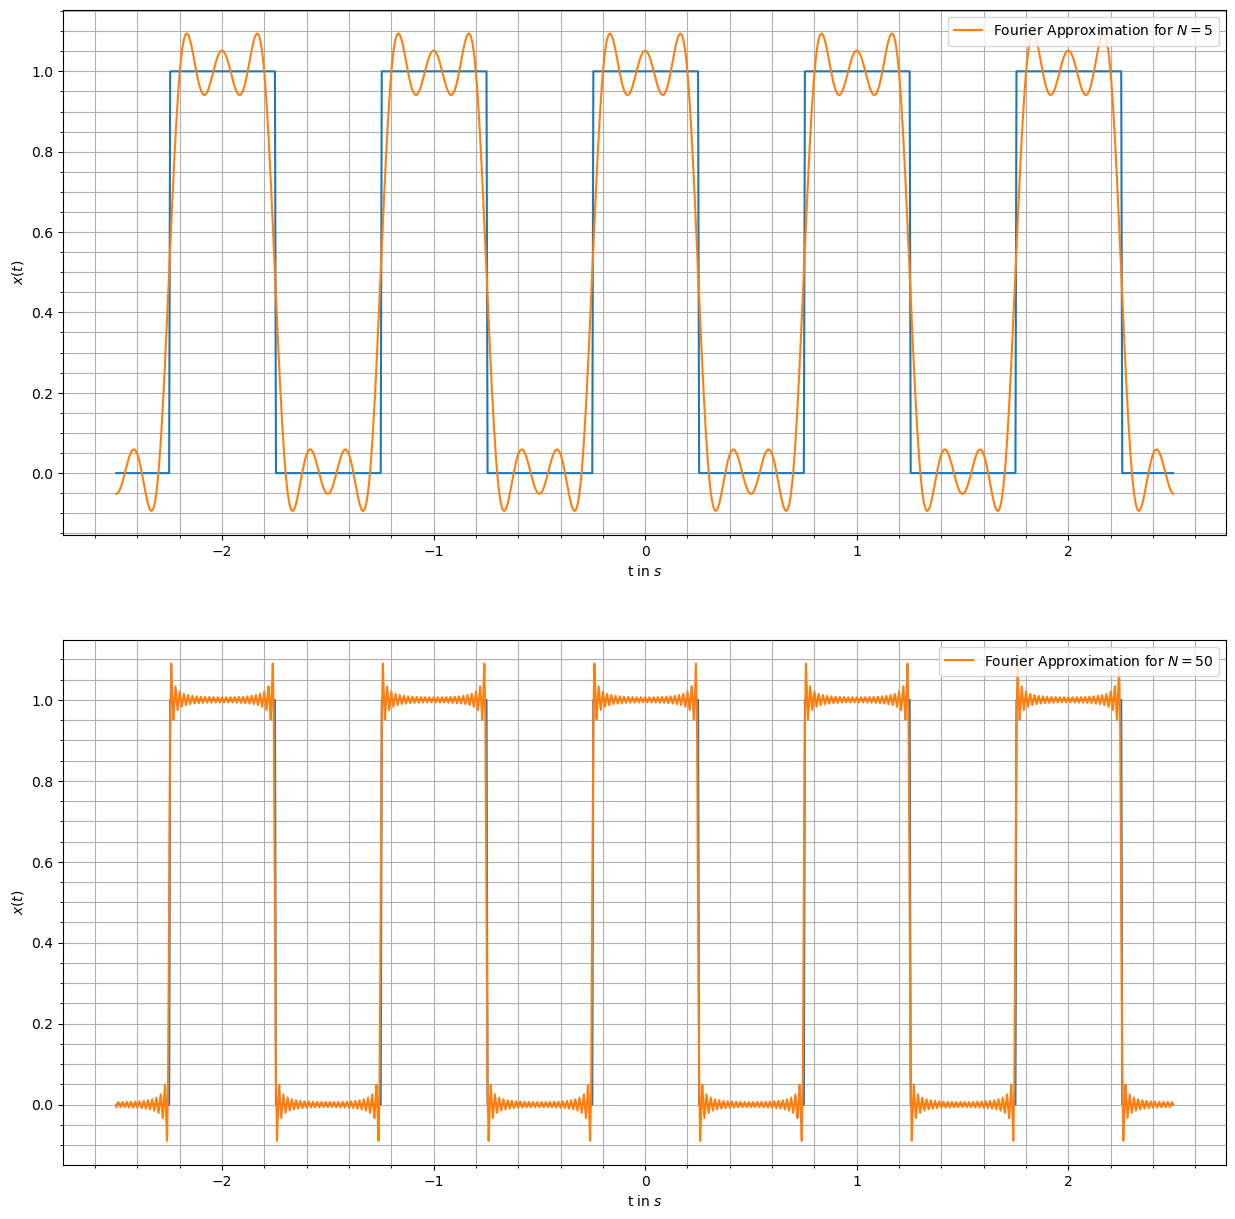

In [146]:
#plotting the square wave and the fourier series approximation for N=5
fig,axs=plt.subplots(2,1,figsize=(15,15))

axs[0].plot(time,x)   #plotting the square wave
axs[0].plot(time,y,label='Fourier Approximation for $N=5$')    #plotting the fourier series approximation for N=5
axs[0].set(xlabel='t in $s$',ylabel='$x(t)$')      #setting x and y labels

axs[0].minorticks_on()
axs[0].grid(visible=True, which='both')
axs[0].legend(loc='upper right')

#plotting the square wave and the fourier series approximation for N=50

axs[1].plot(time,x)   #plotting the square wave
axs[1].plot(time,y2,label='Fourier Approximation for $N=50$')    #plotting the fourier series approximation for N=50
axs[1].set(xlabel='t in $s$',ylabel='$x(t)$')      #setting x and y labels

axs[1].minorticks_on()
axs[1].grid(visible=True, which='both')
axs[1].legend(loc='upper right')

plt.show()  #displaying the plot


When the N increase the Fourier Approximation gets more accurate.
Fourier series approximation for $N=50$ represents the square pulse better than the Forier series aproximation for $N=5$ 

## Fourier Series Coefficients

Plot fourier series coefficients vs k

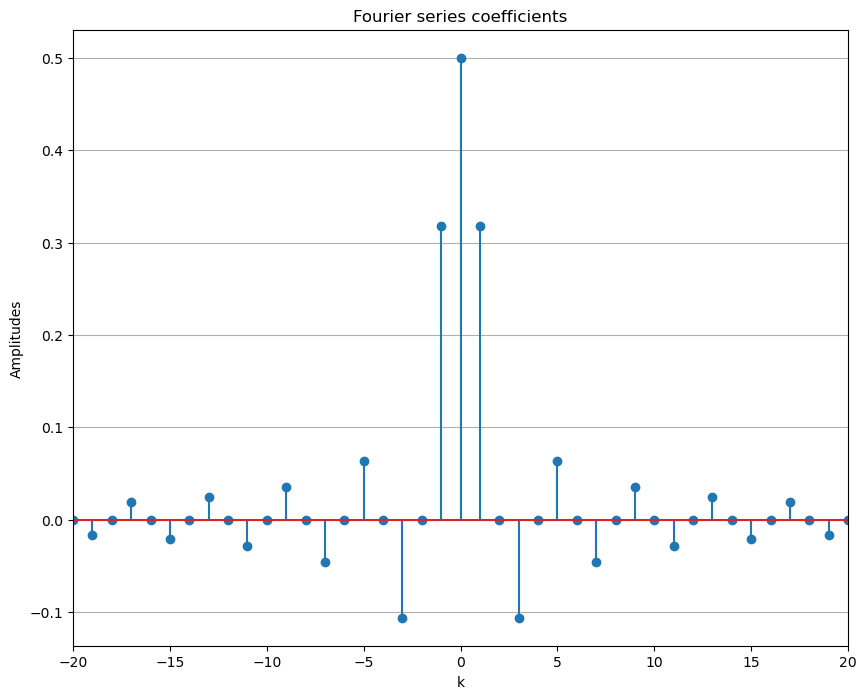

In [147]:
k=np.arange(-20,21,1) #creating an array k with integers in the interval -20 and 20
ak=[]

for i in k:
    ak.append(a(i)) #calculating the fourier series coefficients for each k

#plotting the fourier series coefficients
    
fig,ax=plt.subplots(figsize=(10,8))      
ax.stem(k,ak)
ax.set_xlim(-20,20)
ax.grid(axis='y')
ax.set_xlabel('k')
ax.set_ylabel('Amplitudes')
ax.set_title('Fourier series coefficients')
plt.show()



Plot normalized fast fourier transform coefficients vs k

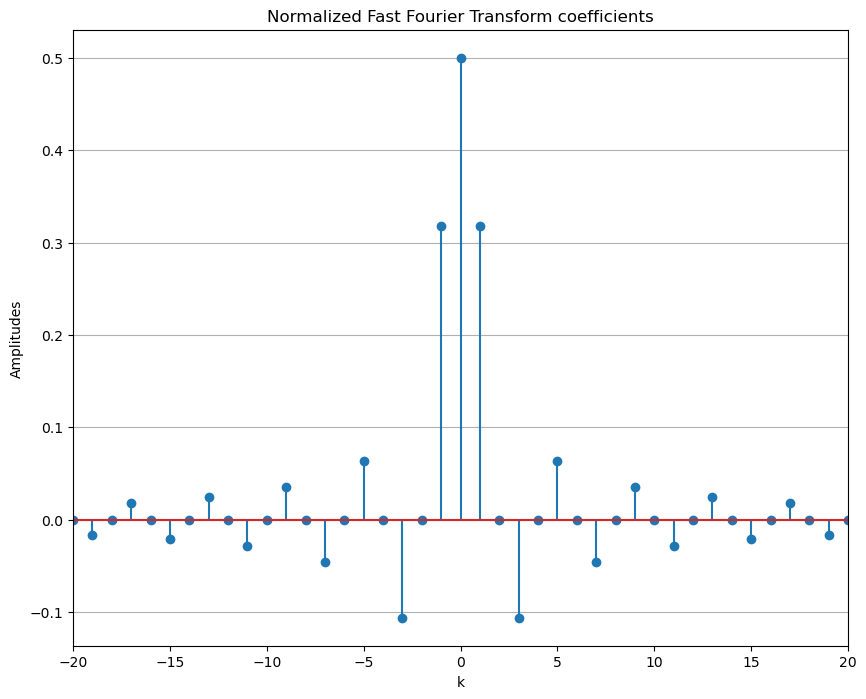

In [148]:
N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
    x.append(square(i))

    # Obtaining FFT coefficients
X = fftshift(fft(x))
X_norm = X.real/N
k = np.linspace(-N/2, N/2-1, N)

# plotting fft coefficients

fig,ax=plt.subplots(figsize=(10,8))      
ax.stem(k,X_norm)
ax.set_xlim(-20,20)
ax.grid(axis='y')
ax.set_xlabel('k')
ax.set_ylabel('Amplitudes')
ax.set_title('Normalized Fast Fourier Transform coefficients')

plt.show()




Both Fourier series coefficients and Normalized Fast Fourier Transform coefficients provides same value for given k.

## Ideal Filters and Actual Filters

Complete the function $x(t)$ to return the function value given in the following equation  
&nbsp;&nbsp;&nbsp;&nbsp;    $x(t) = a_{1} sin(\omega_{1} t ) +  a_{2} sin(\omega_{2} t ) +  a_{3} sin(\omega_{3} t )$  
where $a_{1}=0.75$ , $a_{2}=1$, $a_{3}=0.5$, $\omega_{1}=100\pi$, $\omega_{2}=400\pi$, $\omega_{3}=800\pi$ 

In [149]:
# Creating 3 sinusoidal signals

w1 = 100*np.pi
w2 = 400*np.pi
w3 = 800*np.pi

a1 = 0.75
a2 = 1
a3 = 0.5

fs = 4095
ws = 2*np.pi*fs

def x(t):
    x_t =a1*np.cos(w1*t) + a2*np.cos(w2*t) + a3*np.cos(w3*t) #calculating x(t)
    return x_t



Plot the waveform of $x(t)$ in time domain.

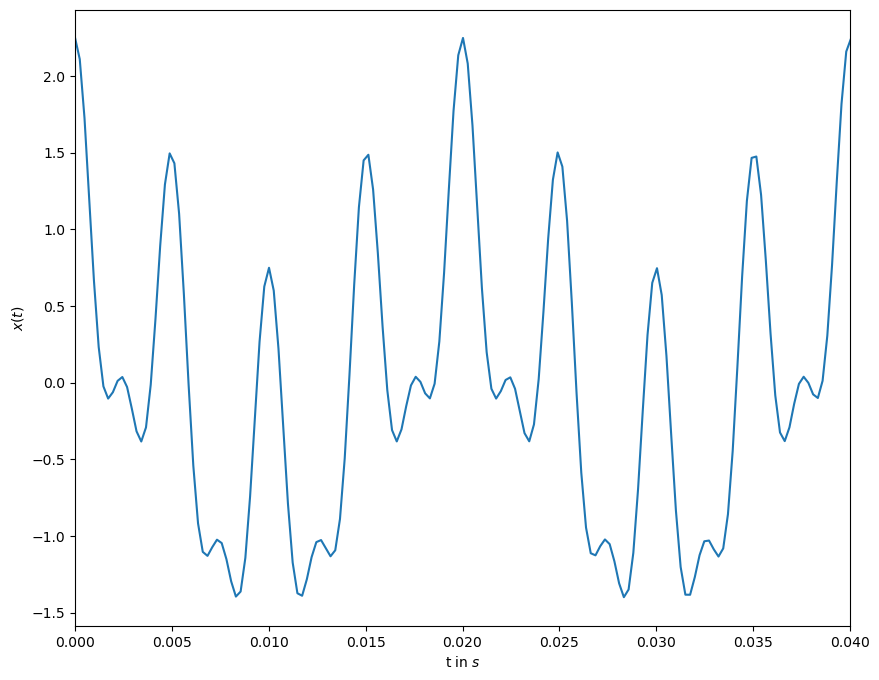

In [150]:
t = np.linspace(0,1,fs+1)
xt=[x(t_) for t_ in t]

# plotting the input signal in time domain

fig,ax=plt.subplots(figsize=(10,8))
ax.plot(t,xt)
ax.set_xlim(0,0.04)     #limiting the x axis to 0-0.04
ax.set_xlabel('t in $s$')
ax.set_ylabel('$x(t)$')

plt.show()

Complete the python code for plotting ***absolute*** value of the Fourier transform of $x(t)$, that is $X\omega$ against the angular frequency $\omega$. Execute the cell and sketch the result.

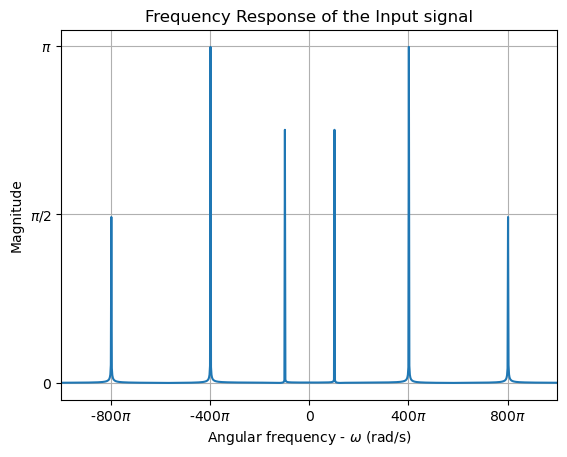

In [151]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2

# Plotting the input signal in frequency domain
fig, ax = plt.subplots()

ax.plot(w,abs(Xw)) #plotting the magnitude of the frequency response


ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

Complete the function, ideal_filter(w) to output the $H(j\omega)$.

In [152]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2

def ideal_filter(w):
    gain = 1
    if not(wc1<abs(w)<wc2):
        gain = 0       #cutting off the frequencies outside the range wc1<w<wc2

    return gain

### Ideal Filter: Part A

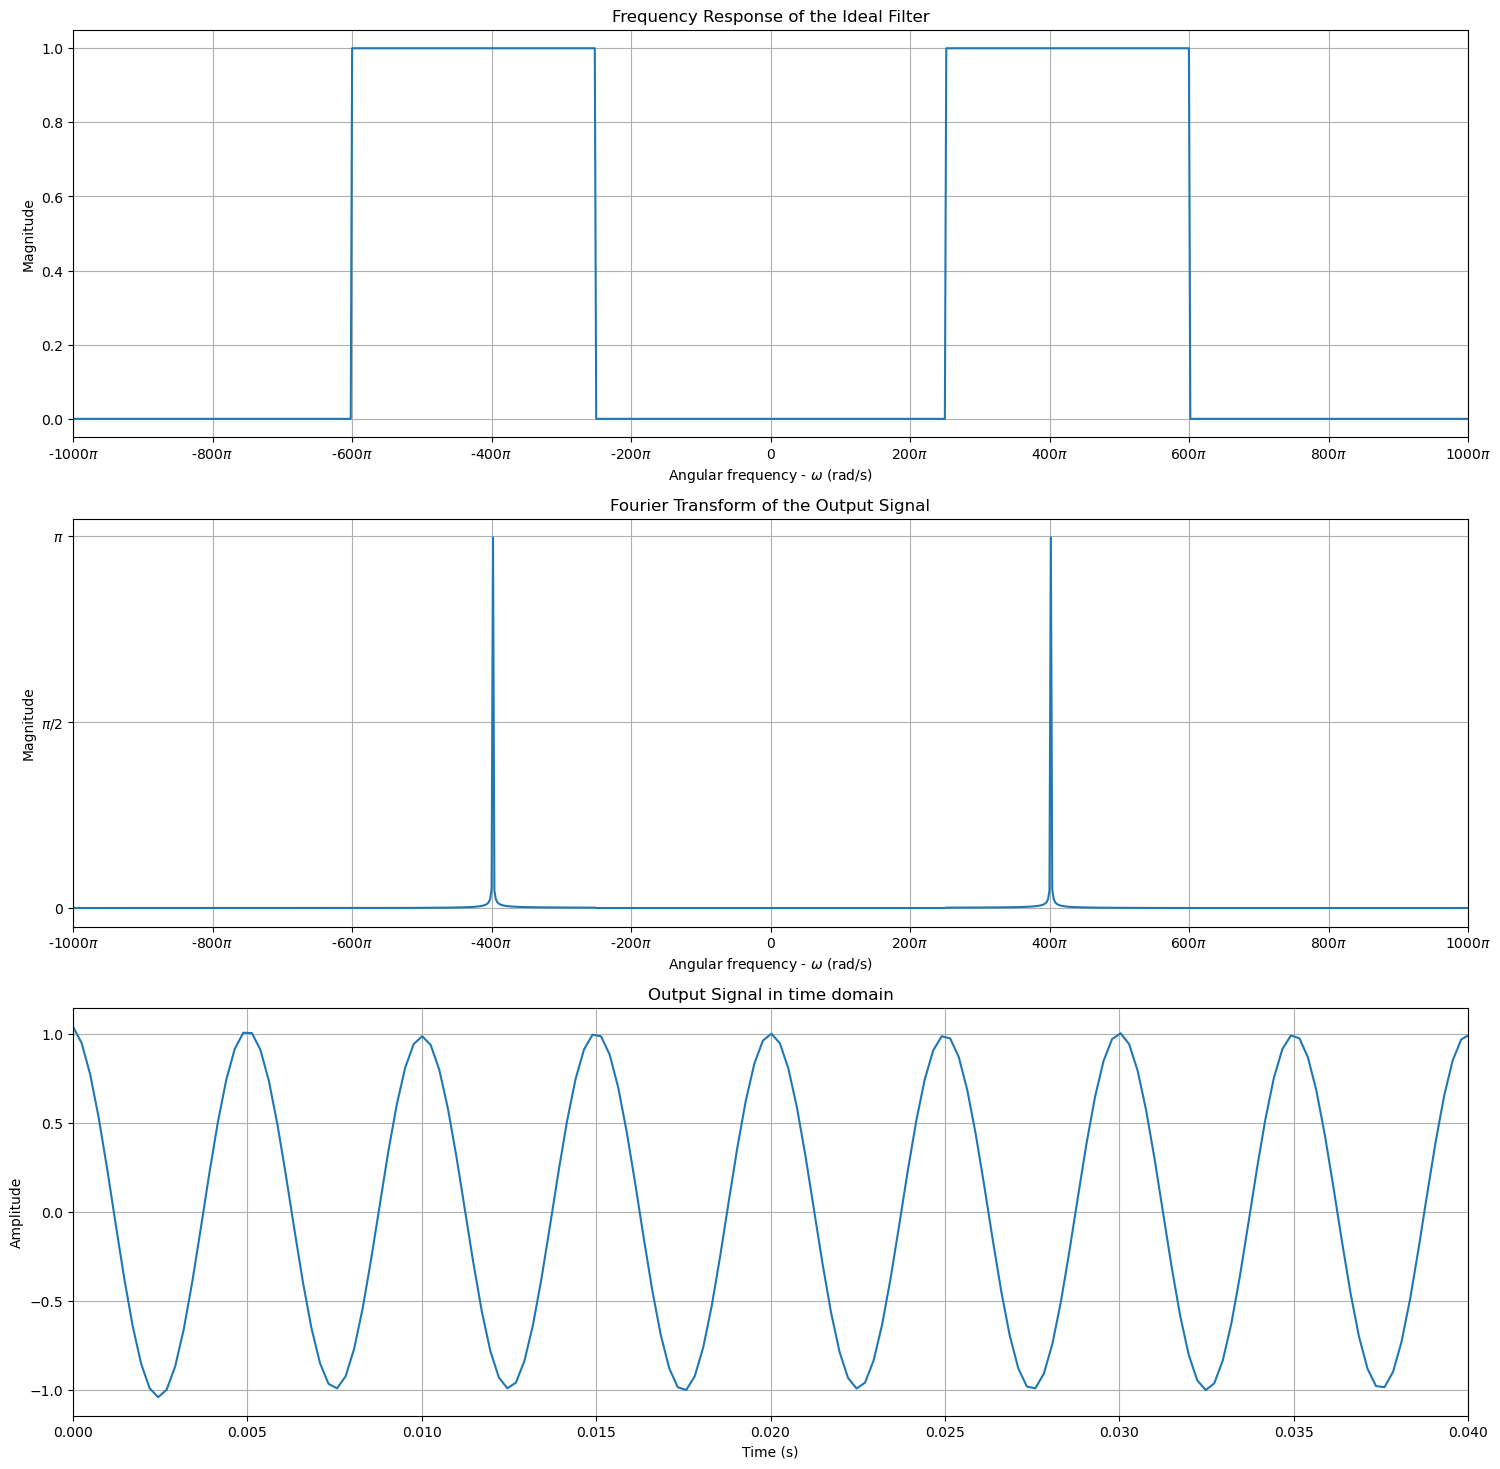

In [153]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2


H0w = [ideal_filter(w_) for w_ in w] #calculating the frequency response of the ideal filter

# Simulation of Filtering
Y0w = np.multiply(Xw,H0w)

# Obtaining the time domain signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))

# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))

axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

# Output signal in time domain
axes[2].plot(t,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

### Ideal Filter: Part B

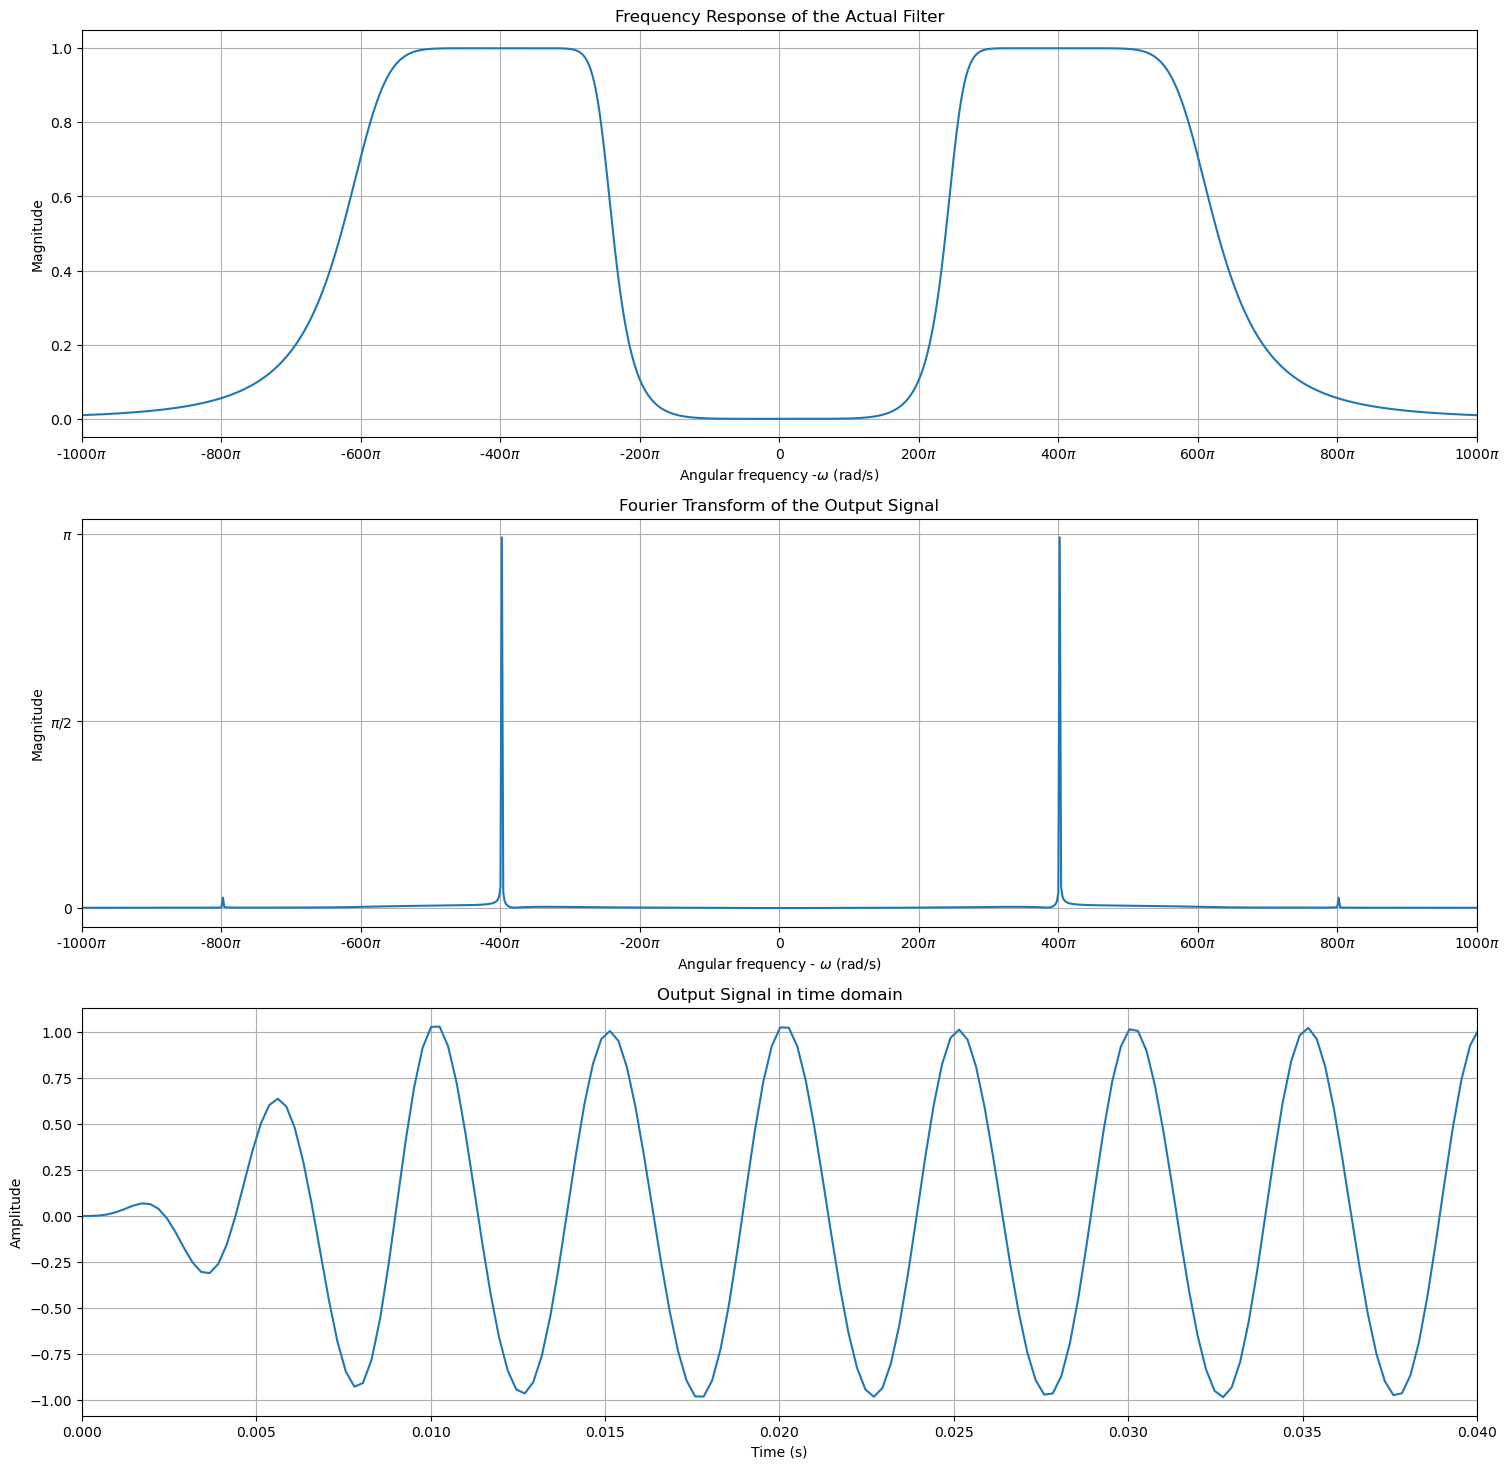

In [154]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)
# Filtering
y = signal.lfilter(b,a,xt)

# Obtaining the frequency response of the output signal
Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)

# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency -'+r'$\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the actual filter output (magnitude)
axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# # Output signal in time domain
axes[2].plot(t,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

In the ideal filter in part A it cuts of all the frequencies outside the range. It's frequency domain respone is 1 for the given range and 0 elsewhere.  
In part B frequency domain response is decaying outside the range. So it is not able cut the frequencies closer to the range completely. This is how practical filters operate.


## Removing Power Line Noise in an ECG Signal

***Task 1***  
Write a python script to read the data in the file ecg_signal.csv and fill the list ecg with the data

In [155]:
# Reading the ECG data

ecg = []
import csv
with open ('ecg_signal.csv') as f:
    reader=csv.reader(f)
    
    for row in reader:
        ecg.append(float(row[0]))
    f.close()




duration = 10 # seconds
T = duration/len(ecg)
Fs = 1/T
# Obtaining the fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

***Task 2***  
Plot the absolute value of the Fourier transform with respect to frequency. Limit the x-axis to the interval [−100, 100]. Sketch the output.

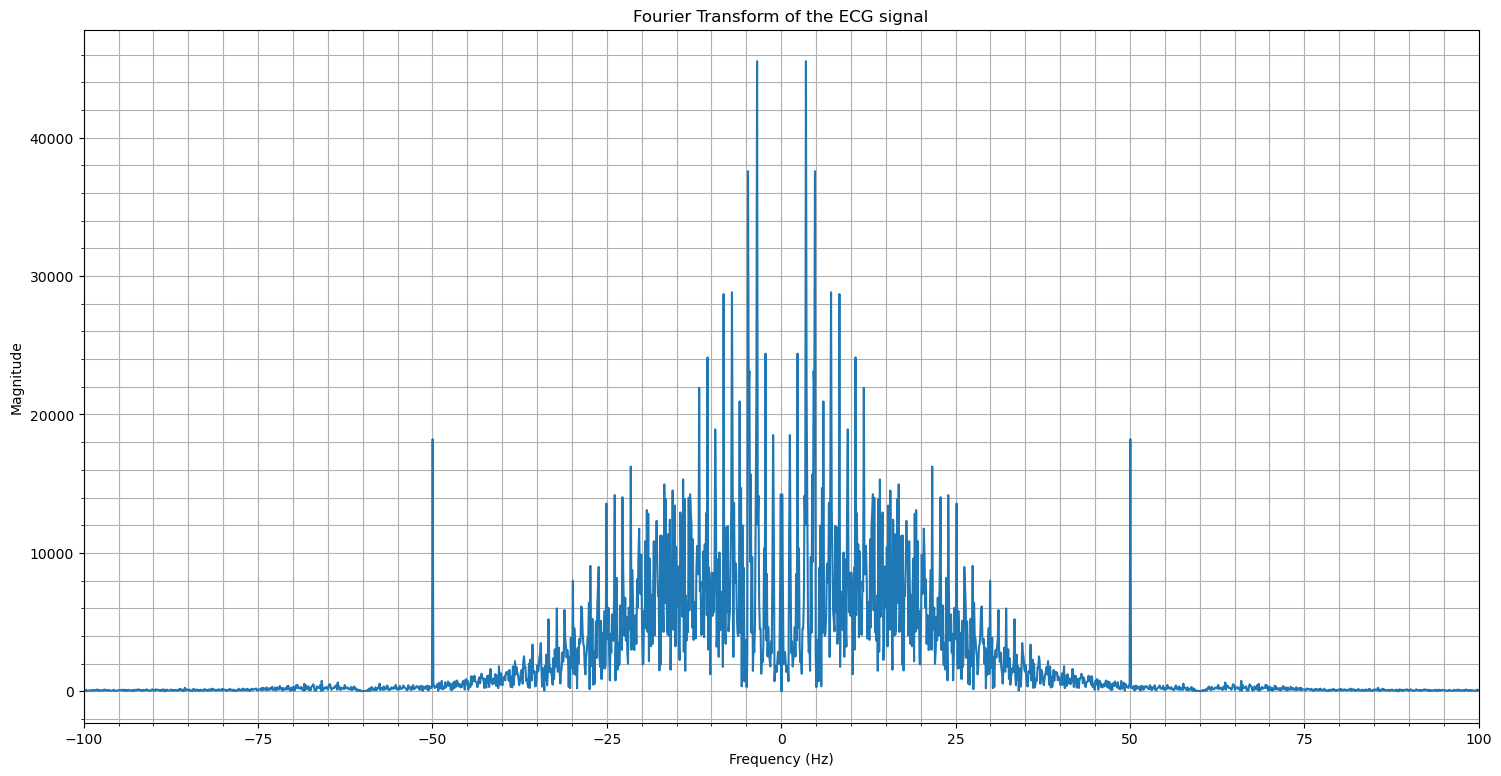

In [156]:
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlim(-100,100)
ax.plot(fr,abs(F))
ax.set_title('Fourier Transform of the ECG signal')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.minorticks_on()
ax.grid(visible=True, which='both')


***Task 3***  
What type of filter that can be used to remove the noise at 50 Hz?  
&nbsp;&nbsp;&nbsp; A bandstop filter.

***Task 4***  
Edit the code below with the correct name of the filter selecting from the table given below. Execute the cell and sketch the frequency response of the filter.

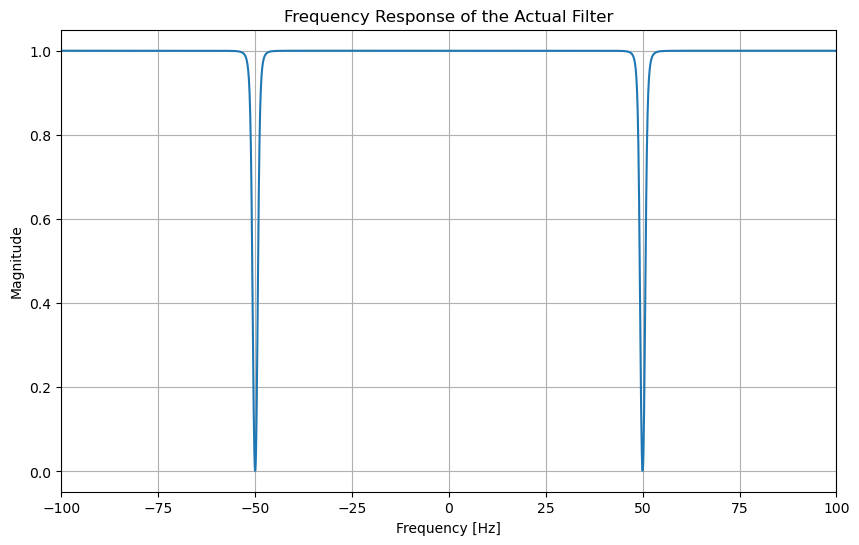

In [157]:
# Designing the filter
f1 = 49
f2 = 51

filter_type = 'bandstop' #selecting the filter type

b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)


# Obtaining the frequency response of the filter

ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)


# Plotting the frequency response

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()

***Task 5***  
Edit the given below to plot the input and the output waveforms vs time. Use the subplots function to plot the graphs in two axes in the same figure. Limit the x-axis to the interval [0, 3]. Sketch the result.

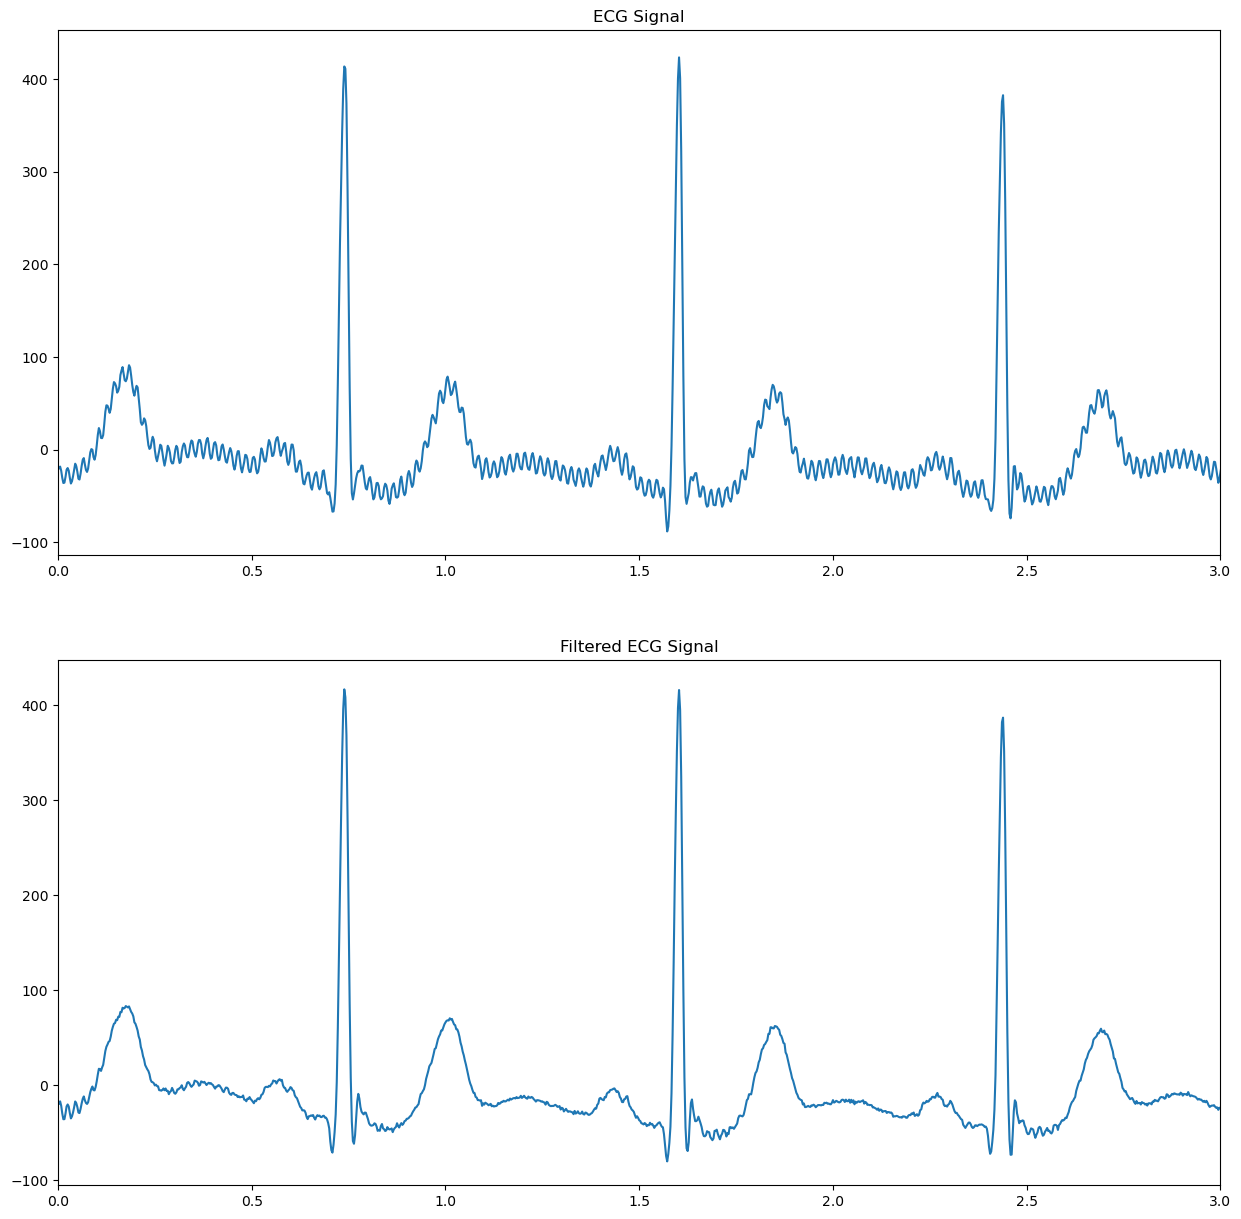

In [158]:
time = np.arange(T, duration+T, T)

# Filtering the ECG wavefoem
output = signal.lfilter(b, a, ecg)

# Plotting the output signal
fig, axes = plt.subplots(2,1,figsize=(15,15))

axes[0].plot(time,ecg)
axes[0].set_title('ECG Signal')
axes[0].set_xlim(0,3)

axes[1].plot(time,output)
axes[1].set_title('Filtered ECG Signal')
axes[1].set_xlim(0,3)

plt.show()


***Task 6***  
Complete the code in below to plot the absolute value of Fourier transform of the output waveform with respect to the frequency. Limit the x-axis to the interval [−100, 100]. Execute the cell sketch the output.

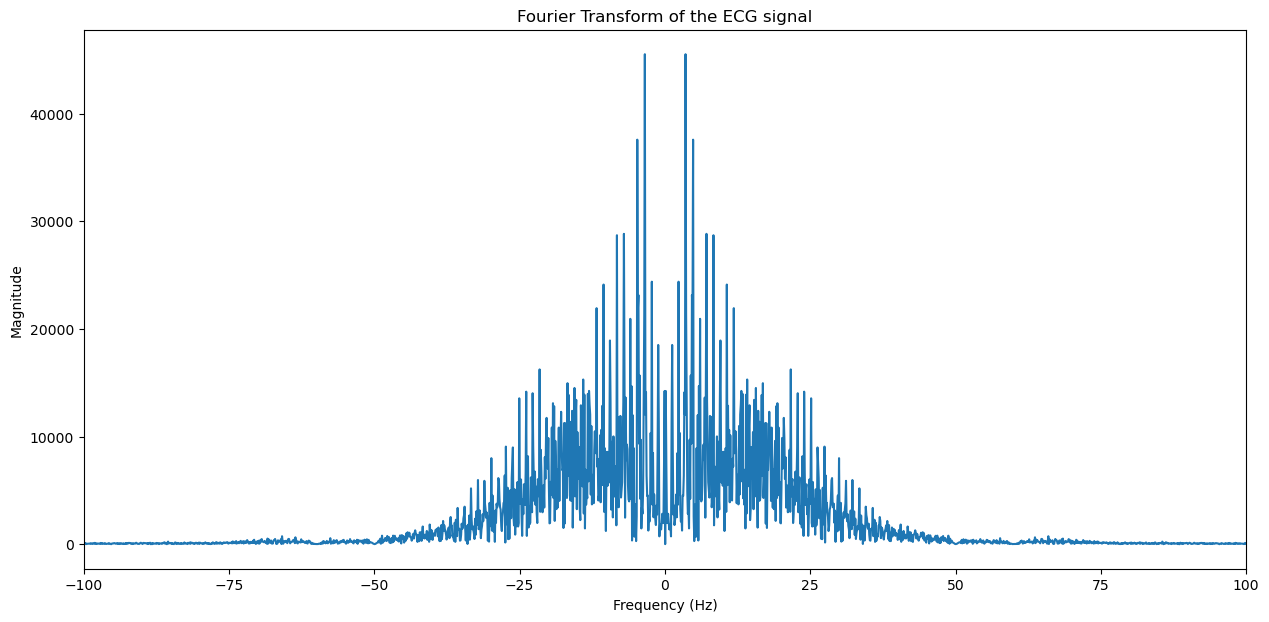

In [159]:
F = fftshift(fft(output))

# Plotting the frequency response of the filtered ECG signal

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(fr,abs(F))
ax.set_title('Fourier Transform of the ECG signal')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)

plt.show()